### Trabalho de demonstração de tecnicas de Natural Language Processing - PLN na língua Portuguesa, para fins academicos ou de portifólio, utilizando biblioteca NLTK e WordCloud.

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Criação dataset fictício com noticias reais retiradas dos sites de noticias:
https://www.rtp.pt/ <br>
https://exame.com/tecnologia/

In [7]:
data = {
    "texto": [
        "A seleção portuguesa de andebol vai defrontar o Egito no Torneio Internacional Terras do Demo, em Moimenta da Beira, em duas ocasiões, a primeira das quais na quinta-feira, de forma preparar a participação no Europeu2026.",
        "A gigante americana do retalho online Amazon anunciou hoje a eliminação de 14 mil postos de trabalho, sem especificar em que localizações, mas referindo-se a uma reduçao global",
        "De acordo com dados de notas fiscais de IVA, as empresas chinesas aumentaram seus investimentos em inovação nos primeiros três trimestres de 2025.",
        "Os médios João Neves e Fabián Ruiz estão de volta aos treinos do Paris Saint-Germain, anunciou hoje o clube de futebol francês, na véspera do jogo em Lorient, a contar para a 10.ª jornada da Ligue 1.",
        "O chefe do Estado-Maior do Exército francês, Pierre Schill, voltou a comentar as novas ameaças que pairam sobre o continente europeu.",
        "A Apple deve ultrapassar pela primeira vez neste ano a marca de US$ 100 bilhões em receita anual de serviços, segundo o Financial Times.",
        "O Sporting, finalista vencido em 2024/25, recebe esta terça-feira o Alverca, que disputa pela primeira vez a competição, no arranque dos quartos de final da Taça da Liga de futebol.",
        "O presidente norte-americano, Donald Trump, afirmou que o homólogo russo, Vladimir Putin, deveria terminar a guerra na Ucrânia em vez de testar um míssil nuclear",
        "O sucesso dos “supertênis” não impediu a Nike de investir em tecnologias ainda mais inovadoras para aprimorar o desempenho nos treinos.",
        "O argentino Lionel Messi, para muitos o melhor jogador da história do futebol, afirmou que ganhar o Mundial de 2022 foi o sonho da sua vida e que gostaria de defender o título em campo, em 2026."
    ],
    "categoria": [
        "Desporto",
        "Economia",
        "Tecnologia",
        "Desporto",
        "Economia",
        "Tecnologia",
        "Desporto",
        "Economia",
        "Tecnologia",
        "Desporto"
    ]
}

df = pd.DataFrame(data)

print("---- Dataset de Notícias ----")
df

---- Dataset de Notícias ----


,texto,categoria
0,A seleção portuguesa de andebol vai defrontar ...,Desporto
1,A gigante americana do retalho online Amazon a...,Economia
2,"De acordo com dados de notas fiscais de IVA, a...",Tecnologia
3,Os médios João Neves e Fabián Ruiz estão de vo...,Desporto
4,"O chefe do Estado-Maior do Exército francês, P...",Economia
5,A Apple deve ultrapassar pela primeira vez nes...,Tecnologia
6,"O Sporting, finalista vencido em 2024/25, rece...",Desporto
7,"O presidente norte-americano, Donald Trump, af...",Economia
8,O sucesso dos “supertênis” não impediu a Nike ...,Tecnologia
9,"O argentino Lionel Messi, para muitos o melhor...",Desporto


## Limpeza do texto

#### É preciso fazer uma limpeza dos textos, convertendo o texto para minúsculas e removendo todos os caracteres que não sejam letras, números, underscores ou espaços.

In [8]:
def limpar_texto(texto):
    texto_limpo = re.sub(r'[^\w\s]', '', texto.lower())
    return texto_limpo

#### É preciso criar uma função que receba um documento (texto) e devolva o texto sem as stopwords.

In [11]:
def remover_stopwords(texto):
    tokens = word_tokenize(texto, language='portuguese')
    stopwords_pt = set(stopwords.words('portuguese'))
    tokens_sem_stopwords = [t for t in tokens if t not in stopwords_pt]
    return " ".join(tokens_sem_stopwords)

#### É preciso aplicar as funções anteriores ao dataframe (df)

In [12]:
df["texto_limpo"] = df["texto"].apply(limpar_texto).apply(remover_stopwords)

In [13]:
df

,texto,categoria,texto_limpo
0,A seleção portuguesa de andebol vai defrontar ...,Desporto,seleção portuguesa andebol vai defrontar egito...
1,A gigante americana do retalho online Amazon a...,Economia,gigante americana retalho online amazon anunci...
2,"De acordo com dados de notas fiscais de IVA, a...",Tecnologia,acordo dados notas fiscais iva empresas chines...
3,Os médios João Neves e Fabián Ruiz estão de vo...,Desporto,médios joão neves fabián ruiz volta treinos pa...
4,"O chefe do Estado-Maior do Exército francês, P...",Economia,chefe estadomaior exército francês pierre schi...
5,A Apple deve ultrapassar pela primeira vez nes...,Tecnologia,apple deve ultrapassar primeira vez neste ano ...
6,"O Sporting, finalista vencido em 2024/25, rece...",Desporto,sporting finalista vencido 202425 recebe terça...
7,"O presidente norte-americano, Donald Trump, af...",Economia,presidente norteamericano donald trump afirmou...
8,O sucesso dos “supertênis” não impediu a Nike ...,Tecnologia,sucesso supertênis impediu nike investir tecno...
9,"O argentino Lionel Messi, para muitos o melhor...",Desporto,argentino lionel messi muitos melhor jogador h...


#### Por fim, é feito uma Wordclouds por categoria para fazer uma representação visual de palavras em que o tamanho de cada palavra indica sua frequencia dentro de um conjunto de texto.

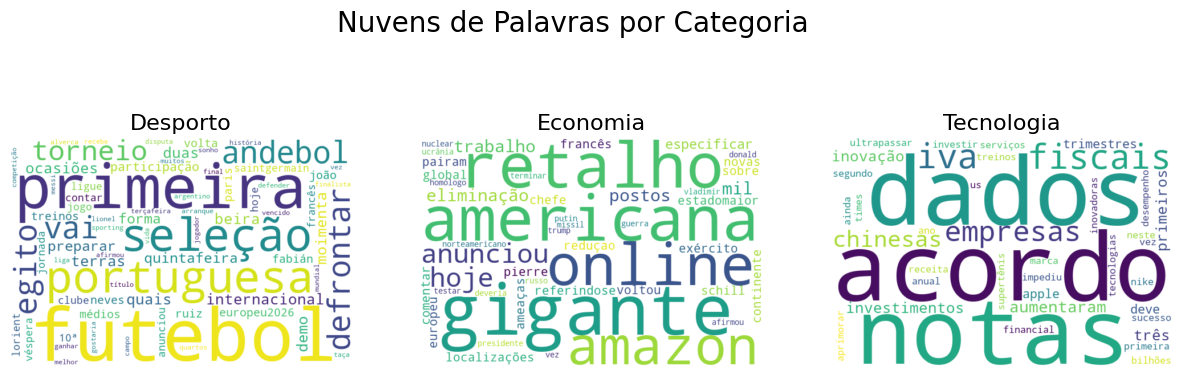

In [14]:
# Obter todas as categorias únicas presentes na coluna "categoria" do DataFrame
categorias = df["categoria"].unique()  # Ex.: ['Desporto', 'Economia', 'Tecnologia']

# Criar uma figura para a visualização das WordClouds, definindo o tamanho da figura
plt.figure(figsize=(15, 5))

# Iterar sobre cada categoria, enumerando para definir a posição do subplot
for i, cat in enumerate(categorias, 1):

    # Selecionar todos os textos correspondentes à categoria atual e concatená-los numa única string
    texto_cat = " ".join(df[df["categoria"] == cat]["texto_limpo"])

    # Gerar a WordCloud para a categoria atual
    wc = WordCloud(
        width=600,
        height=400,
        background_color="white",  # Cor de fundo branca
        colormap="viridis"         # Paleta de cores
    ).generate(texto_cat)

    # Criar um subplot para a WordCloud da categoria atual
    # O layout é de 1 linha e número de colunas igual ao número de categorias
    plt.subplot(1, len(categorias), i)

    # Exibir a WordCloud no subplot, utilizando interpolação bilinear para suavizar a imagem
    plt.imshow(wc, interpolation="bilinear")

    # Desativar os eixos para uma visualização mais limpa
    plt.axis("off")

    # Adicionar o título do subplot com o nome da categoria
    plt.title(cat, fontsize=16)

# Adicionar um título geral à figura, que engloba todas as WordClouds
plt.suptitle("Nuvens de Palavras por Categoria", fontsize=20)

# Apresentar a figura final com todas as WordClouds
plt.show()